# Kernel-based Learning

## 1. Background

### 1-1. VC Dimension   
   - **shattering**(classifier가 모든 subset의 경우를 분류)할 수 있는 maximum number of data point.  
   - classification algorithm의 capacity를 측정하기 위한 방법.
   - 아래 그림처럼, 2차원에서 선형분류기의 경우, 4개의 점부터는 분류 불가한 subset이 있으므로 VC Dimension은 3.  

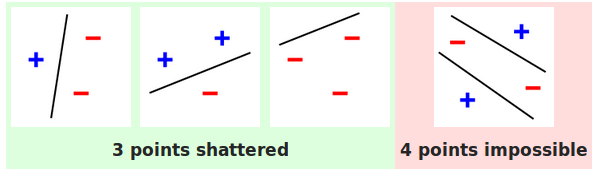

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
Image(filename="C:/Users/dsba/Downloads/ba/vcd.png",width=400,height=450)

### 1-2. Empirical Risk Minimization vs Structural Risk Minimization  
   - ERM의 경우 학습 데이터에 대해 손실이 적은 모델로, training error를 계속 줄이다보면 overfitting되어 test error가 증가할 수 있다.  
   - SRM은 training error와 model complexity를 고려한 모델로, training error를 줄이는 방향으로 vc dim 이 계속 증가하지 않도록 parameter 개수에 penalty를 줌으로써 tradeoff를 발생시켜서 balancing 함.(dim을 감소시키면 test error의 upper bound를 감소시켜서 특정 데이터에 오버피팅되는 것을 방지)  
   - SVM에서 margin을 최대화한다는 것은 test error를 줄이기 위함이고, VC Dimension을 줄이는 방향으로 나아가야 한다.  
   
  $$R[f] \le R_{emp}[f] +\sqrt{{h(ln{{2n}\over n} +1) - ln{{\sigma} \over 4}} \over n}  $$
   
### 1-3. Duality
   - 원 문제를 좀 더 쉽게 풀기 위해, 식들과 목적함수를 변형하는 것. 원 문제와 쌍대문제 두 관점에서 문제를 볼 수 있다는 것.  
   
### 1-4. KKT(Karush-Kuhn-Tucker) 조건

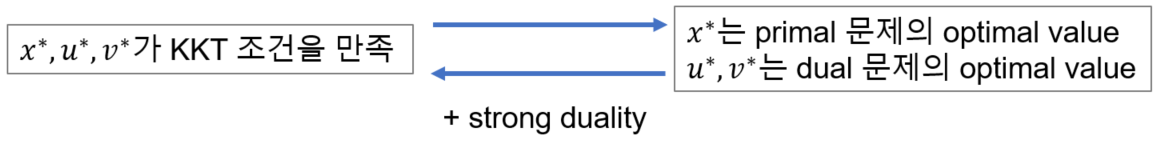

In [5]:
Image(filename="C:/Users/dsba/Downloads/ba/kkt.png",width=600,height=450)

## 2. SVM(Support Vector Machine)
    - 데이터의 라벨을 이용해 분류하는 모델을 만드는데, 분류되는 경계부분의 폭이 가장 큰 것을 찾는 알고리즘.
    - 선형인지 비선형인지, 오분류를 어느 정도 허용할 것인지에 따라 모델이 조금씩 변형됨.  
   - Binary Classification Problem에 적용.  
   - ANN과 다르게 local minima에 빠지지 않음.
    
### 2-1. Linear & Hard Margin SVM   
   -  label이 정해진 데이터들을 선형으로 분류하는데, Margin을 고정시킨 상태로 학습.  
   
   


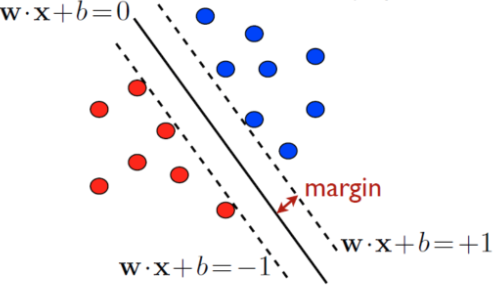

In [8]:
Image(filename="C:/Users/dsba/Downloads/ba/svm.png",width=300,height=450)

   - **학습 과정 **  

   $$w^Tx+b=0$$  
   
   
   1. 위의 초평면에 대해 +1 과 -1을 기준으로 분류하는 plus평면과 minus평면을 정의하여 둘 사이의 거리(margin)을 구한다.  
   2. 그 margin을 최대화하는 문제를, 역수로 하여 최소화하는 문제로 변형한다.  $$min   {1\over2} \lVert w \rVert^2 $$  
   $$s.t. y_i(w^Tx_i+b) \ge 1$$  
   
   
   3. 초평면들을 기준으로 라벨을 분류하는 식들을, 라그랑조 기법을 활용해 하나의 식으로 정리한다. 
   $$min  {1\over2} \lVert w \rVert^2 - \sum_{i=1}^N a_i(y_i(w^Tx_i+b) - 1)$$  
   
   
   4. 여기서 KKT 조건에 따라 구하고자 하는 w의 값을 미분을 통해 정리할 수 있다.$$w = \sum_{i=1}^N a_iy_ix_i$$  
   
   5. 미분을 통해 얻은 식을 목적함수에 대입하여 쌍대문제로 변형하고, 그를 통해 a값들을 구하여(quadratic programming 을 통해)
       w값을 최종적으로 구한다.  
   6. 여기서 구해지는 a값 중에 0이 아닌 값들에 해당하는 x,y의 값들이 마진을 결정하는 경계에 있는 서포트 벡터라고 볼 수 있다. 
   
### 2-2. Linear & Soft Margin SVM
   - 선형으로 분류하되, 어느정도의 오차를 인정하는 Margin을 가지는 알고리즘.  
   
   


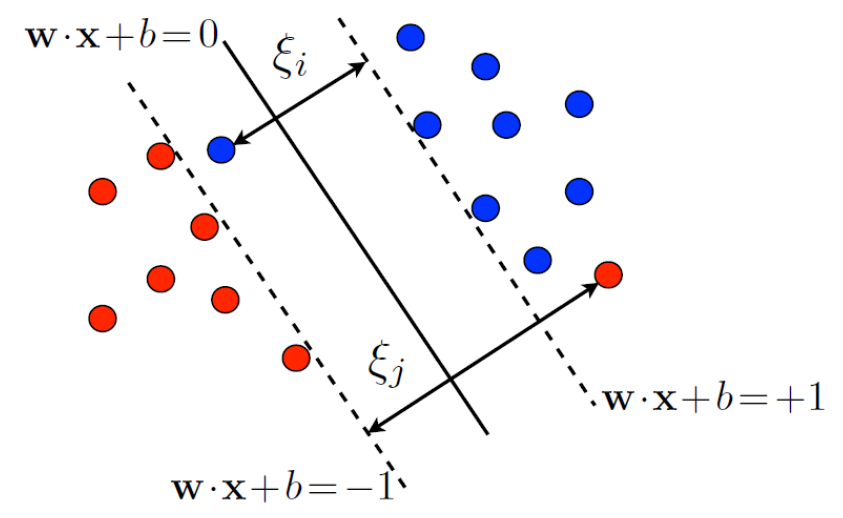

In [9]:
Image(filename="C:/Users/dsba/Downloads/ba/csvm.png",width=300,height=450)

   - **학습 과정 **  
  
  
  1. 다른 것은 그대로 이지만. 목적함수와 제약조건이 다음과 같이 바뀐다.  
   $$min   {1\over2} \lVert w \rVert^2 + C\sum_{i=1}^N \xi _i$$  
   $$s.t. y_i(w^Tx_i+b) \ge 1-\xi _i  ,   \xi _i \ge 0$$  
   
   
   2. 위와 똑같이 라그랑조 기법을 이용해 식을 정의하면,  
    $$min   {1\over2} \lVert w \rVert^2 + C\sum_{i=1}^N \xi _i - \sum_{i=1}^N a_i(y_i(w^Tx_i+b) - 1+ \xi_i) - \sum_{i=1}^N u_i\xi_i$$
    $$s.t. a_i \ge 0$$  
    
    
   3. 여기서도 KKT조건에 의해 w는 위와 같은 방법으로 구할 수 있다.  
   4. a값이 0이 0~C 값 사이면 결정경계 위에 있는 서포트 벡터이고, C값이면 margin 밖에 있는 어느정도 인정해주는 서포트 벡터들이다.  
   
   
   
   
   
### 2-3. Non-Linear & Soft Margin SVM
   - 비선형으로 분류되는 객체들을 고차원의 공간으로 매핑한 후, 선형 분류와 함께 어느정도의 오차를 인정하는 Margin을 가지는 알고리즘.  
  

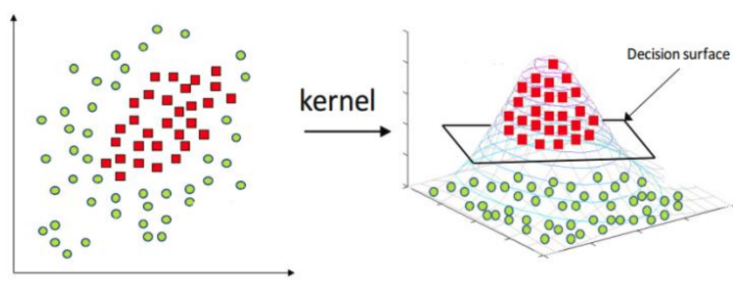

In [12]:
Image(filename="C:/Users/dsba/Downloads/ba/ksvm.png",width=400,height=450)

   - 학습과정은 2-2번과 동일하다. 다만, x대신에 고차원으로 매핑된 새로운 x를 사용하면 됨.  
   
   
   
### 2-4. Kernel Trick  
   - 마진을 최대화 하는 과정에서, 각 객체들을 매핑하고 다시 내적을하는 계산과정을 겪기 때문에 연산량이 높기에 커널을 이용.  
   - 커널 함수를 객체 한쌍을 매핑한 후 내적하는 식으로 표현.(A는 고차원으로 매핑하는 선형변환 함수) 
   
   $$K(x_i,x_j)=\Phi(x_i)^T\Phi(x_j)=x_i^TA^TAx_j$$  
   
   
   - 여기서 K는 symmetric해야하고(내적값은 스칼라값으로 K(i,j)와 K(j,i)가 같음), 항상 0 이상인 positive semi-definite matrix이다.  
   - 이런 성질들을 충족하는(Mercer's Theorem) 함수들은 커널 함수로 쓸 수 있다.
   
   
   $$linear : K(x_1,x_2)=x_1^Tx_2$$
   $$polynomial : K(x_1,x_2)=(ax_1^Tx_2+b)^Q$$
   $$Gaussian : K(x_1,x_2)=exp{(-(x_1-x_2)^2)}$$  
   
   
   - 가우시안의 경우 두 객체 내적값의 exp 값은 테일러 급수에 의해, 무한대 차원의 공간으로 매핑함.
   
   
   - 장점  
    계산복잡도 감소 / 비선형 경계 생성 가능 / 가우시안이 많이 쓰이며, 숫자 이미지 데이터도 커널을 이용해 매핑하여 svm으로 분류 가능.  

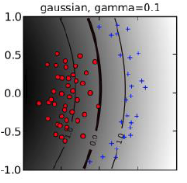

In [15]:
Image(filename="C:/Users/dsba/Downloads/ba/kernel.png",width=200,height=450)

### 2-5. code 구현

#### 다음과 같은 데이터의 경우

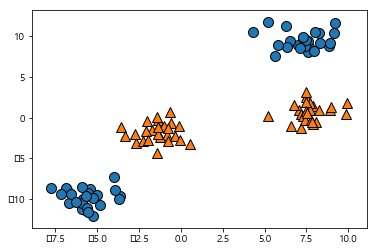

In [45]:
from sklearn.datasets import make_blobs
import mglearn
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#### 선형 svm을 만들면 분류가 잘 되지 않는다.

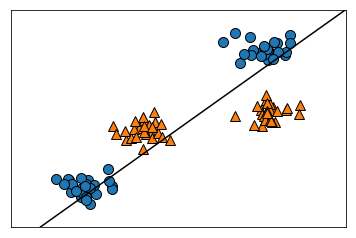

In [49]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#### 본 데이터를 고차원으로 이동시켜서 선형으로 분리 가능하도록 커널을 설정할 수 있다.

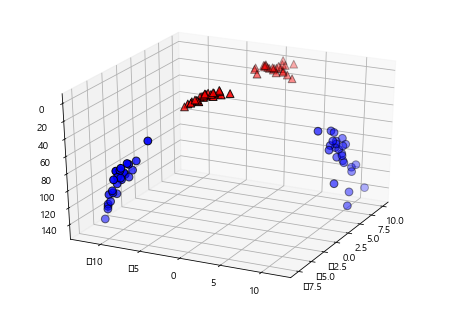

In [52]:
X_new = np.hstack([X, X[:, 1:] ** 2]) #y축의 값을 제곱해서 한 차원을 추가한다.

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0인 포인트를 먼저 그리고 그다음 y == 1인 포인트를 그립니다.
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

#### rbf 커널을 이용해서 고차원으로 매핑된 데이터들을 구분하는 모델을 만든다.

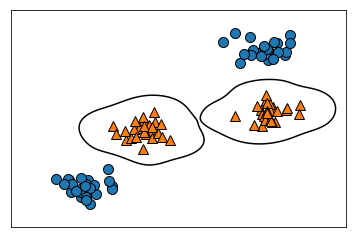

In [68]:
rbf_svm = SVC(C=0.5,kernel='rbf', gamma='auto').fit(X, y)

mglearn.plots.plot_2d_separator(rbf_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

#### rbf 커널에서 C값과 gamma 값을 변형하면서 잘 구분하는 선을 찾을 수 있다.

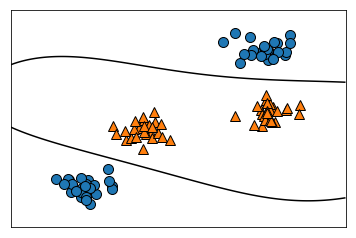

In [59]:
from sklearn.svm import SVC
rbf_svm = SVC(C=0.5,kernel='rbf', gamma=0.01).fit(X, y)

mglearn.plots.plot_2d_separator(rbf_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

## 3. SVR(Support Vector Regression)
    - 데이터를 잘 설명하는 회귀 선을 만들고 입실론으로 margin을 설정, 그 margin과의 차이 값을 loss 함수값과 비교해 넘게 하지 않는, 그 loss function 값들의 합을 최소화하도록 학습.
    - 선형, 비선형 모두 회귀 가능(커널 이용).  
   - loss function을 매우 다양하게 적용할 수 있음.  
   - 커널을 이용하면, 선형결합인 linear regression과 다르게 비선형의 모델을 가질 수 있음.(일반적으로 더 성능 좋음)
    


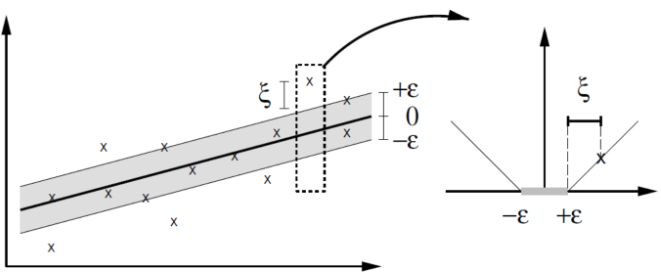

In [6]:
Image(filename="C:/Users/dsba/Downloads/ba/svr.png",width=500,height=450)

### 3-1. 학습 알고리즘
   - 구하고자 하는 회귀 식 $$f(x) = w^Tx+b$$  
   
   - 학습하고자 하는 목적식
$$min   {1\over2} \lVert w \rVert^2 + C\sum_{i=1}^N (\xi _i + \xi _i^*)$$  
   $$s.t. (w^Tx_i+b) - y_i \le \epsilon + \xi _i  $$ 
   $$ y_i - (w^Tx_i+b) \le \epsilon + \xi _i^*  $$ 
   $$\xi _i, \xi _i^* \ge 0$$   
   
   
### 3-2. code 구현

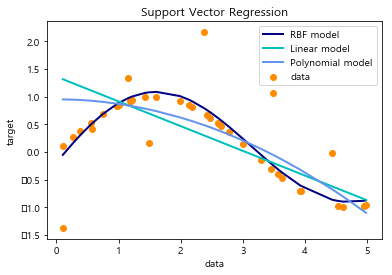

In [34]:
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt
#
from sklearn.svm import SVR, SVC
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# #############################################################################
# Look at the results
lw = 2
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=lw, label='RBF model')
plt.plot(X, y_lin, color='c', lw=lw, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()